# Exploratory Data Analysis on Diamonds
## Frank Coleman III
### Dataset retrieved from: *https://www.kaggle.com/shivam2503/diamonds*

## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

### Importing Libaries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Reading in the Data

In [2]:
df = pd.read_csv("diamonds.csv")
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.tail(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


### Exploring the Dataset

In [3]:
df.shape

(53940, 11)

In [4]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

### Looking for Missing Data

In [8]:
# how many variables are numerical?
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)


8

In [9]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages


Unnamed: 0    0.0
carat         0.0
cut           0.0
color         0.0
clarity       0.0
depth         0.0
table         0.0
price         0.0
x             0.0
y             0.0
z             0.0
dtype: float64

<AxesSubplot:>

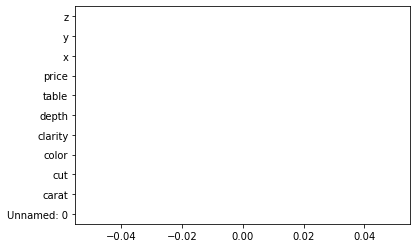

In [10]:
missing_percentages.plot(kind='barh')

### Removing and Renaming Columns

In [11]:
#The column "unnamed:0" is an index column that provides no beneficial information. It is unnecessary and needs to be dropped.

df = df.drop(["Unnamed: 0"], axis=1)

In [12]:
#Making sure unnamed:0 is dropped
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [13]:
#Renaming columns to remove ambiguity
#change depth to depth percentage, x to length, y to width, and z to depth
df = df.rename(
    columns={"depth": "depthper", "x": "length", "y": "width", "z": "depth"})
df


,carat,cut,color,clarity,depthper,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
df.describe()

,carat,depthper,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


length, width, and depth all have minimum values of 0

In [15]:
# this brings up all of the rows with 0 in any of those three places
df.loc[(df['length']==0) | (df['width']==0) | (df['depth']==0)]

,carat,cut,color,clarity,depthper,table,price,length,width,depth
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [16]:
non_zero_per = (df.astype(bool).sum(axis=0)/len(df))*100

<AxesSubplot:>

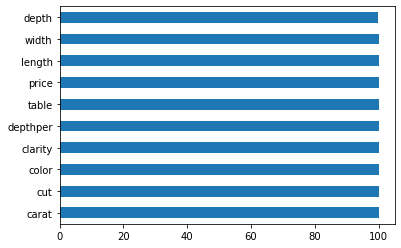

In [17]:
non_zero_per.plot(kind="barh")

In [18]:
#replacing missing depth with formula for depth
df["depth"] = np.where(df["depth"] == 0.0, 
                             (((df["length"] + df["width"])/2)*df["depthper"]),
                             df["depth"])

In [19]:
#Deleting rows where length is 0
df = df[df["length"] != 0]

### Creating Functions Relating to Finding the Interquartile Range and Detecting Outliers

In [20]:
#IQR
def iqr(column):
    return (np.quantile(column, .75)) - (np.quantile(column, .25))


def print_iqr(input, iqr_var):
    return print(f"{input} IQR is: " + str(iqr_var))


#Lower limit
def lower_limit(column, iqr_var):
    return round((np.quantile(column, .25) - 1.5*iqr_var), 2)


def print_lower_limit(input, low_lim_var):
    return print(f"{input} lower limit is: " + str(low_lim_var))


#Upper limit
def upper_limit(column, iqr_var):
    return round((np.quantile(column, .75) + 1.5*iqr_var), 2)


def print_upper_limit(input, up_lim_var):
    return print(f"{input} upper limit is: " + str(up_lim_var))


In [21]:
#lower limit outliers
def low_outliers(df, column, low_lim_var):
    return df[column < low_lim_var].shape[0]
    
    
def low_out_p(input, low_out_var):
    return print(f"The number of low {input} outliers is: " + str(low_out_var))


#upper limit outliers
def upper_outliers(df, column, up_lim_var):
    return df[column > up_lim_var].shape[0]


def up_out_p(input, up_out_var):
    return print(f"The number of high {input} outliers is: " + str(up_out_var))


#total outliers
def total_outliers(input, low_out_var, up_out_var):
    return print(f"The total number of {input} outliers is: " + (str(low_out_var+ up_out_var)))


#low outliers as a % of the entire dataset
def low_outliers_per(low_out_var, df):
    return low_out_var / df.shape[0]
#need to find a way to round this cause round("", 2) ain't working

def low_out_per_p(input, low_out_per_var):
    return print(f"The total percentage of diamonds that have low {input} outliers is: " + str(low_out_per_var * 100) + "%")


#upper outliers as a % of the entire dataset
def upper_outliers_per(up_out_var, df):
    return up_out_var / df.shape[0]


def up_out_per_p(input, up_out_per_var):
    return print(f"The total percentage of diamonds that have upper {input} outliers is: " + str(up_out_per_var * 100) + "%")


#total outliers as a % of the entrie dataset
def total_outliers_per(input, low_out_per_var, up_out_per_var):
    return print(f"The total percentage of diamonds that have {input} outliers is: " + (str((low_out_per_var + up_out_per_var)*100)) +"%")

### Function to find the largest observations in a column

In [22]:
def largest(input, column):
    return df.nlargest(input, [column])

In [23]:
largest(4, "width")

,carat,cut,color,clarity,depthper,table,price,length,width,depth
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


## Exploratory Analysis and Visualization

Columns we'll analyze:

1. Price
2. Carat
3. Depthper
4. Table
5. Length
6. Width
7. Depth
8. Cut
9. Color
10. Clarity

In [24]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depthper', 'table', 'price',
       'length', 'width', 'depth'],
      dtype='object')

# Univariate Analysis

## Numerical Variables

## Price

In [25]:
df["price"].describe()

count    53932.000000
mean      3932.136079
std       3988.734835
min        326.000000
25%        949.750000
50%       2401.000000
75%       5324.000000
max      18823.000000
Name: price, dtype: float64

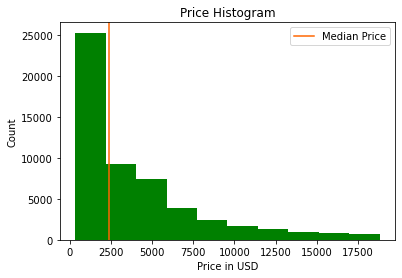

In [26]:
plt.hist(df['price'], color = 'g', bins=10)
plt.axvline((np.quantile(df['price'], .5)),color='#ff6500',label='Median Price')
plt.legend()
plt.xlabel('Price in USD')
plt.ylabel('Count')
plt.title('Price Histogram')
plt.show()

In [27]:
largest_price = largest(10,'price')

In [28]:
largest_price.describe()

,carat,depthper,table,price,length,width,depth
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,2.00600,61.690000,57.400000,18802.300000,8.080000,8.061000,4.97800
std,0.24061,1.522024,2.270585,10.965096,0.384216,0.361216,0.22449
min,1.51000,58.100000,54.000000,18791.000000,7.370000,7.410000,4.56000
25%,2.00000,61.025000,55.250000,18795.000000,7.912500,7.977500,4.85750
50%,2.02000,62.050000,58.000000,18800.000000,8.165000,8.075000,5.02500
75%,2.13000,62.575000,59.000000,18805.500000,8.350000,8.332500,5.14750
max,2.29000,63.500000,60.000000,18823.000000,8.520000,8.470000,5.24000


### Determining the IQR for Price and Potential Outliers

In [29]:
price_iqr = iqr(df["price"])
print_iqr("Price", price_iqr)

price_lower_limit = lower_limit(df["price"], price_iqr)
print_lower_limit("Price", price_lower_limit)

price_upper_limit = upper_limit(df["price"], price_iqr)
print_upper_limit("Price", price_upper_limit)

Price IQR is: 4374.25
Price lower limit is: -5611.62
Price upper limit is: 11885.38


In [30]:
price_low_outliers = low_outliers(df=df, column=df["price"], low_lim_var=price_lower_limit)
low_out_p(input="price", low_out_var=price_low_outliers)

price_upper_outliers = upper_outliers(df=df, column=df["price"], up_lim_var=price_upper_limit)
up_out_p(input="price", up_out_var=price_upper_outliers)

price_total_outliers = total_outliers("price", price_low_outliers, price_upper_outliers)

The number of low price outliers is: 0
The number of high price outliers is: 3537
The total number of price outliers is: 3537


In [31]:
price_low_outliers_per = low_outliers_per(low_out_var=price_low_outliers, df=df)
low_out_per_p(input="price", low_out_per_var=price_low_outliers_per)

price_upper_outliers_per= upper_outliers_per(up_out_var=price_upper_outliers, df=df)
up_out_per_p(input="price", up_out_per_var=price_upper_outliers_per)

total_outliers_per(input='price', low_out_per_var=price_low_outliers_per, up_out_per_var=price_upper_outliers_per)

The total percentage of diamonds that have low price outliers is: 0.0%
The total percentage of diamonds that have upper price outliers is: 6.558258547800934%
The total percentage of diamonds that have price outliers is: 6.558258547800934%


[Text(0.5, 1.0, 'Price Boxplot')]

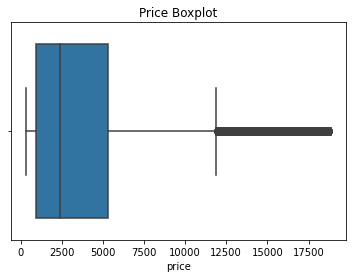

In [33]:
sns.boxplot(x=df['price']).set(title='Price Boxplot')

## Carat

In [34]:
df['carat'].describe()

count    53932.000000
mean         0.797879
std          0.473986
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [35]:
largest(10, 'carat')

,carat,cut,color,clarity,depthper,table,price,length,width,depth
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
27679,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03


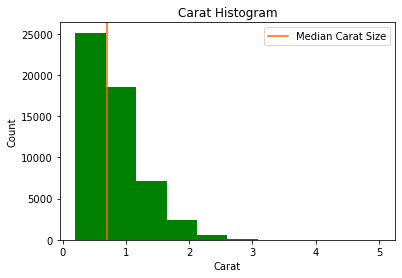

In [36]:
plt.hist(df['carat'], color = 'g', bins=10)
plt.axvline((np.quantile(df['carat'], .5)),color='#ff6500',label='Median Carat Size')
plt.legend()
plt.xlabel('Carat')
plt.ylabel('Count')
plt.title('Carat Histogram')
plt.show()

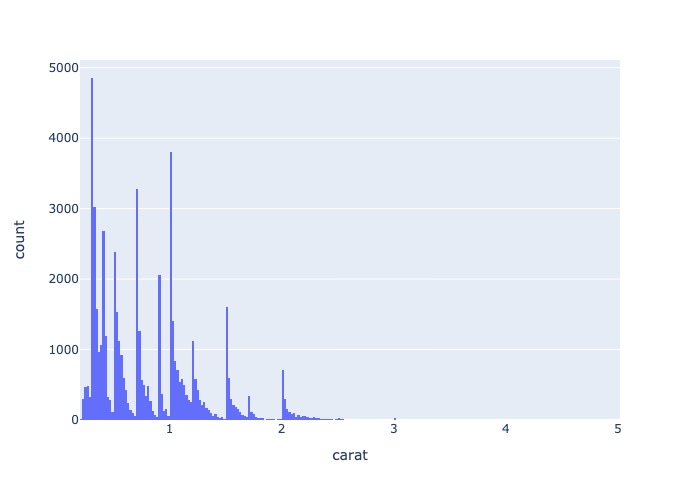

In [133]:
fig = px.histogram(df, x="carat")
fig.show('png')


[Text(0.5, 1.0, 'Carat Boxplot')]

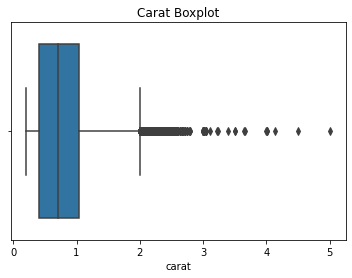

In [44]:
sns.boxplot(x=df['carat']).set(title='Carat Boxplot')

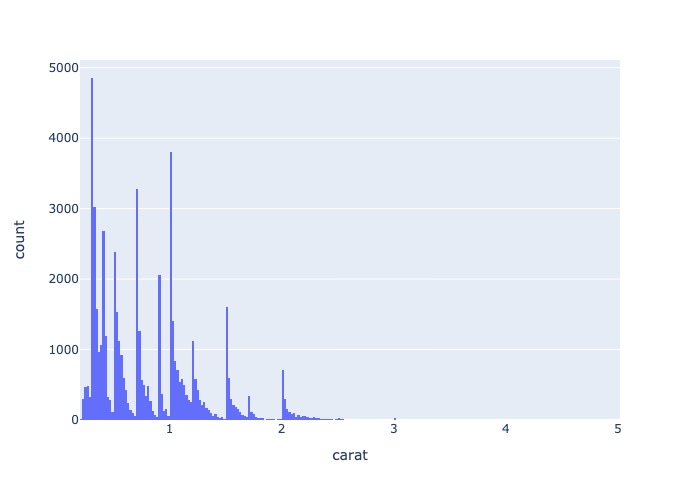

In [132]:
fig=px.histogram(df, x="carat")
fig.show('png')

### Determining the IQR for Carat and Potential Outliers

In [46]:
carat_iqr = iqr(df["carat"])
print_iqr("Carat", carat_iqr)

carat_lower_limit = lower_limit(df["carat"], carat_iqr)
print_lower_limit("Carat", carat_lower_limit)

carat_upper_limit = upper_limit(df["carat"], carat_iqr)
print_upper_limit("Carat", carat_upper_limit)

Carat IQR is: 0.64
Carat lower limit is: -0.56
Carat upper limit is: 2.0


In [47]:
carat_low_outliers = low_outliers(df=df, column=df["carat"], low_lim_var=carat_lower_limit)
low_out_p(input="carat", low_out_var=carat_low_outliers)

carat_upper_outliers = upper_outliers(df=df, column=df["carat"], up_lim_var=carat_upper_limit)
up_out_p(input="carat", up_out_var=carat_upper_outliers)

carat_total_outliers = total_outliers("carat", carat_low_outliers, carat_upper_outliers)

The number of low carat outliers is: 0
The number of high carat outliers is: 1888
The total number of carat outliers is: 1888


In [48]:
carat_low_outliers_per = low_outliers_per(low_out_var=carat_low_outliers, df=df)
low_out_per_p(input="carat", low_out_per_var=carat_low_outliers_per)

carat_upper_outliers_per= upper_outliers_per(up_out_var=carat_upper_outliers, df=df)
up_out_per_p(input="carat", up_out_per_var=carat_upper_outliers_per)

total_outliers_per(input='carat', low_out_per_var=carat_low_outliers_per, up_out_per_var=carat_upper_outliers_per)

The total percentage of diamonds that have low carat outliers is: 0.0%
The total percentage of diamonds that have upper carat outliers is: 3.500704590966402%
The total percentage of diamonds that have carat outliers is: 3.500704590966402%


## Depthper (Depth Percentage)

In [49]:
df["depthper"].describe()

count    53932.000000
mean        61.749336
std          1.432514
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depthper, dtype: float64

In [50]:
largest(10, 'depthper')

,carat,cut,color,clarity,depthper,table,price,length,width,depth
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
52861,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
41918,1.03,Fair,E,I1,78.2,54.0,1262,5.72,5.59,4.42
46679,0.99,Fair,J,I1,73.6,60.0,1789,6.01,5.80,4.35
53540,0.90,Fair,G,SI1,72.9,54.0,2691,5.74,5.67,4.16
51928,0.96,Fair,G,SI2,72.2,56.0,2438,6.01,5.81,4.28
8672,1.02,Fair,H,VS1,71.8,56.0,4455,6.04,5.97,4.31
4307,0.99,Fair,H,VS2,71.6,57.0,3593,5.94,5.80,4.20
45688,0.70,Fair,D,SI2,71.6,55.0,1696,5.47,5.28,3.85
8186,1.50,Fair,I,I1,71.3,58.0,4368,6.85,6.81,4.87


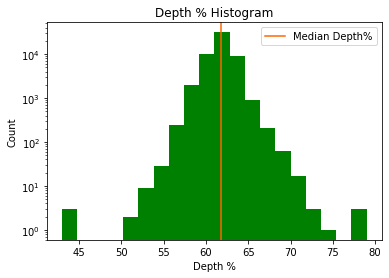

In [51]:
plt.hist(df['depthper'], color = 'g', bins=20, log=True)
plt.axvline((np.quantile(df['depthper'], .5)),color='#ff6500',label='Median Depth%')
plt.legend()
plt.xlabel('Depth %')
plt.ylabel('Count')
plt.title('Depth % Histogram')
plt.show()

[Text(0.5, 1.0, 'Depth % Boxplot')]

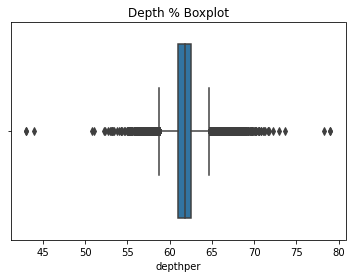

In [53]:
sns.boxplot(x=df['depthper']).set(title='Depth % Boxplot')


### Determining the IQR for Depth Percentage and Potential Outliers

In [54]:
depthper_iqr = iqr(df["depthper"])
print_iqr("Depth %", depthper_iqr)

depthper_lower_limit = lower_limit(df["depthper"], depthper_iqr)
print_lower_limit("Depth %", depthper_lower_limit)

depthper_upper_limit = upper_limit(df["depthper"], depthper_iqr)
print_upper_limit("Depth %", depthper_upper_limit)

Depth % IQR is: 1.5
Depth % lower limit is: 58.75
Depth % upper limit is: 64.75


In [55]:
depthper_low_outliers = low_outliers(df=df, column=df["depthper"], low_lim_var=depthper_lower_limit)
low_out_p(input="depthper", low_out_var=depthper_low_outliers)

depthper_upper_outliers = upper_outliers(df=df, column=df["depthper"], up_lim_var=depthper_upper_limit)
up_out_p(input="depthper", up_out_var=depthper_upper_outliers)

depthper_total_outliers = total_outliers("depthper", depthper_low_outliers, depthper_upper_outliers)

The number of low depthper outliers is: 1505
The number of high depthper outliers is: 1039
The total number of depthper outliers is: 2544


In [56]:
depthper_low_outliers_per = low_outliers_per(low_out_var=depthper_low_outliers, df=df)
low_out_per_p(input="depthper", low_out_per_var=depthper_low_outliers_per)

depthper_upper_outliers_per= upper_outliers_per(up_out_var=depthper_upper_outliers, df=df)
up_out_per_p(input="depthper", up_out_per_var=depthper_upper_outliers_per)

total_outliers_per(input='depthper', low_out_per_var=depthper_low_outliers_per, up_out_per_var=depthper_upper_outliers_per)

The total percentage of diamonds that have low depthper outliers is: 2.7905510643031968%
The total percentage of diamonds that have upper depthper outliers is: 1.926500037083735%
The total percentage of diamonds that have depthper outliers is: 4.717051101386932%


## Table

In [57]:
df["table"].describe()

count    53932.000000
mean        57.457029
std          2.234064
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [58]:
largest(10, 'table')

,carat,cut,color,clarity,depthper,table,price,length,width,depth
24932,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87
50773,0.81,Fair,F,SI2,68.8,79.0,2301,5.26,5.20,3.58
51342,0.79,Fair,G,SI1,65.3,76.0,2362,5.52,5.13,3.35
49375,0.70,Fair,H,VS1,62.0,73.0,2100,5.65,5.54,3.47
51391,0.71,Fair,D,VS2,55.6,73.0,2368,6.01,5.96,3.33
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
52861,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
44938,0.68,Fair,G,SI1,58.0,71.0,1633,5.85,5.70,3.35
314,0.76,Fair,G,VS1,59.0,70.0,2800,5.89,5.80,3.46
777,0.75,Fair,F,VS1,55.8,70.0,2859,6.09,5.98,3.37


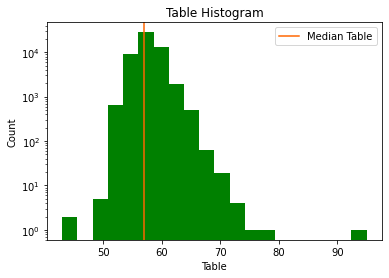

In [59]:
plt.hist(df['table'], color = 'g', bins=20, log=True)
plt.axvline((np.quantile(df['table'], .5)),color='#ff6500',label='Median Table')
plt.legend()
plt.xlabel('Table')
plt.ylabel('Count')
plt.title('Table Histogram')
plt.show()

[Text(0.5, 1.0, 'Table Boxplot')]

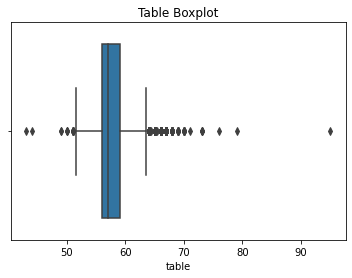

In [60]:
sns.boxplot(x=df['table']).set(title='Table Boxplot')


### Determining the IQR for Table and Potential Outliers

In [61]:
table_iqr = iqr(df["table"])
print_iqr("Table", table_iqr)

table_lower_limit = lower_limit(df["table"], table_iqr)
print_lower_limit("Table", table_lower_limit)

table_upper_limit = upper_limit(df["table"], table_iqr)
print_upper_limit("Table", table_upper_limit)

Table IQR is: 3.0
Table lower limit is: 51.5
Table upper limit is: 63.5


In [62]:
table_low_outliers = low_outliers(df=df, column=df["table"], low_lim_var=table_lower_limit)
low_out_p(input="price", low_out_var=table_low_outliers)

table_upper_outliers = upper_outliers(df=df, column=df["table"], up_lim_var=table_upper_limit)
up_out_p(input="price", up_out_var=table_upper_outliers)

table_total_outliers = total_outliers("table", table_low_outliers, table_upper_outliers)

The number of low price outliers is: 16
The number of high price outliers is: 588
The total number of table outliers is: 604


In [63]:
table_low_outliers_per = low_outliers_per(low_out_var=table_low_outliers, df=df)
low_out_per_p(input="table", low_out_per_var=table_low_outliers_per)

table_upper_outliers_per= upper_outliers_per(up_out_var=table_upper_outliers, df=df)
up_out_per_p(input="table", up_out_per_var=table_upper_outliers_per)

total_outliers_per(input="table", low_out_per_var=table_low_outliers_per, up_out_per_var=table_upper_outliers_per)

The total percentage of diamonds that have low table outliers is: 0.029666988059037308%
The total percentage of diamonds that have upper table outliers is: 1.0902618111696212%
The total percentage of diamonds that have table outliers is: 1.1199287992286584%


## Length

In [64]:
df["length"].describe()

count    53932.000000
mean         5.732007
std          1.119670
min          3.730000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: length, dtype: float64

In [65]:
largest(10, 'length')

,carat,cut,color,clarity,depthper,table,price,length,width,depth
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27679,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
22741,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31


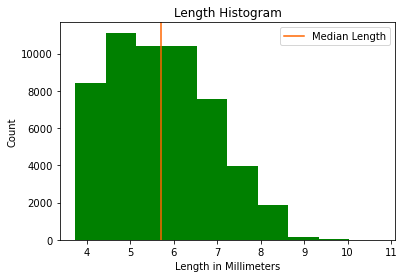

In [66]:
plt.hist(df['length'], color = 'g', bins=10)
plt.axvline((np.quantile(df['length'], .5)),color='#ff6500',label='Median Length')
plt.legend()
plt.xlabel('Length in Millimeters')
plt.ylabel('Count')
plt.title('Length Histogram')
plt.show()

[Text(0.5, 1.0, 'Length Boxplot')]

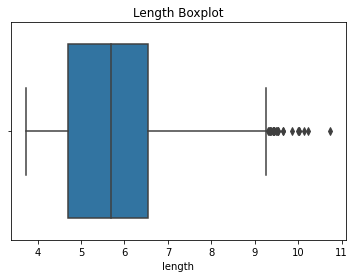

In [67]:
sns.boxplot(x=df['length']).set(title='Length Boxplot')


### Determining the IQR for Length and Potential Outliers

In [68]:
length_iqr = iqr(df["length"])
print_iqr("Price", length_iqr)

length_lower_limit = lower_limit(df["length"], length_iqr)
print_lower_limit("length", length_lower_limit)

length_upper_limit = upper_limit(df["length"], length_iqr)
print_upper_limit("Lenght", length_upper_limit)

Price IQR is: 1.83
length lower limit is: 1.96
Lenght upper limit is: 9.28


In [69]:
length_low_outliers = low_outliers(df=df, column=df["length"], low_lim_var=length_lower_limit)
low_out_p(input="length", low_out_var=length_low_outliers)

length_upper_outliers = upper_outliers(df=df, column=df["length"], up_lim_var=length_upper_limit)
up_out_p(input="length", up_out_var=length_upper_outliers)

length_total_outliers = total_outliers("length", length_low_outliers, length_upper_outliers)

The number of low length outliers is: 0
The number of high length outliers is: 24
The total number of length outliers is: 24


In [70]:
length_low_outliers_per = low_outliers_per(low_out_var=length_low_outliers, df=df)
low_out_per_p(input="length", low_out_per_var=length_low_outliers_per)

length_upper_outliers_per= upper_outliers_per(up_out_var=length_upper_outliers, df=df)
up_out_per_p(input="length", up_out_per_var=length_upper_outliers_per)

total_outliers_per(input="length", low_out_per_var=length_low_outliers_per, up_out_per_var=length_upper_outliers_per)

The total percentage of diamonds that have low length outliers is: 0.0%
The total percentage of diamonds that have upper length outliers is: 0.04450048208855596%
The total percentage of diamonds that have length outliers is: 0.04450048208855596%


## Width

In [71]:
df["width"].describe()

count    53932.000000
mean         5.735254
std          1.140343
min          3.680000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: width, dtype: float64

In [72]:
largest(10,'width')

,carat,cut,color,clarity,depthper,table,price,length,width,depth
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27679,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03


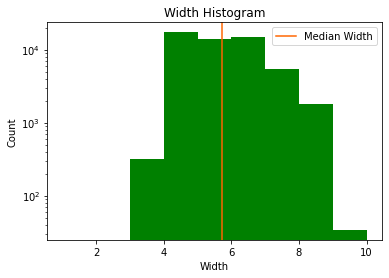

In [73]:
plt.hist(df['width'], color = 'g', bins=[1,2,3,4,5,6,7,8,9,10], log=True)
plt.axvline((np.quantile(df['width'], .5)),color='#ff6500',label='Median Width')
plt.legend()
plt.xlabel('Width')
plt.ylabel('Count')
plt.title('Width Histogram')
plt.show()

[Text(0.5, 1.0, 'Width Boxplot')]

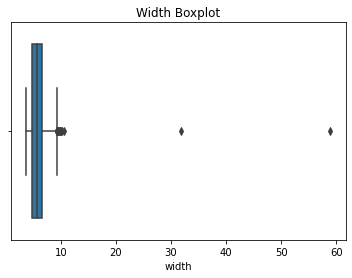

In [74]:
sns.boxplot(x=df['width']).set(title='Width Boxplot')

In [75]:
width_iqr = iqr(df["width"])
print_iqr("Width", width_iqr)

width_lower_limit = lower_limit(df["width"], width_iqr)
print_lower_limit("Width", width_lower_limit)

width_upper_limit = upper_limit(df["width"], width_iqr)
print_upper_limit("Width", width_upper_limit)

Width IQR is: 1.8200000000000003
Width lower limit is: 1.99
Width upper limit is: 9.27


In [76]:
width_low_outliers = low_outliers(df=df, column=df["width"], low_lim_var=width_lower_limit)
low_out_p(input="width", low_out_var=width_low_outliers)

width_upper_outliers = upper_outliers(df=df, column=df["width"], up_lim_var=width_upper_limit)
up_out_p(input="width", up_out_var=width_upper_outliers)

width_total_outliers = total_outliers("width", width_low_outliers, width_upper_outliers)

The number of low width outliers is: 0
The number of high width outliers is: 22
The total number of width outliers is: 22


In [77]:
width_low_outliers_per = low_outliers_per(low_out_var=width_low_outliers, df=df)
low_out_per_p(input="width", low_out_per_var=width_low_outliers_per)

width_upper_outliers_per= upper_outliers_per(up_out_var=width_upper_outliers, df=df)
up_out_per_p(input="width", up_out_per_var=width_upper_outliers_per)

total_outliers_per(input="width", low_out_per_var=width_low_outliers_per, up_out_per_var=width_upper_outliers_per)

The total percentage of diamonds that have low width outliers is: 0.0%
The total percentage of diamonds that have upper width outliers is: 0.040792108581176295%
The total percentage of diamonds that have width outliers is: 0.040792108581176295%


## Depth

In [78]:
df["depth"].describe()

count    53932.000000
mean         3.639935
std          6.795973
min          1.070000
25%          2.910000
50%          3.530000
75%          4.040000
max        566.225000
Name: depth, dtype: float64

In [79]:
largest(10, 'depth')

,carat,cut,color,clarity,depthper,table,price,length,width,depth
27739,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,566.2250
26123,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,519.2110
27112,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,513.7740
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,503.1180
27503,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,500.6595
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,454.0800
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,408.5550
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,405.8160
51506,1.12,Premium,G,I1,60.4,59.0,2383,6.71,6.67,404.0760
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,385.2030


In [80]:
df[df["depth"]==df["depth"].max()]

,carat,cut,color,clarity,depthper,table,price,length,width,depth
27739,2.8,Good,G,SI2,63.8,58.0,18788,8.9,8.85,566.225


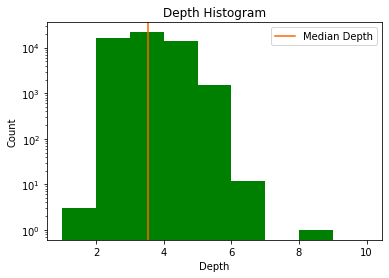

In [81]:
plt.hist(df['depth'], color = 'g', bins=[1,2,3,4,5,6,7,8,9,10], log=True)
plt.axvline((np.quantile(df['depth'], .5)),color='#ff6500',label='Median Depth')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Count')
plt.title('Depth Histogram')
plt.show()

[Text(0.5, 1.0, 'Depth Boxplot')]

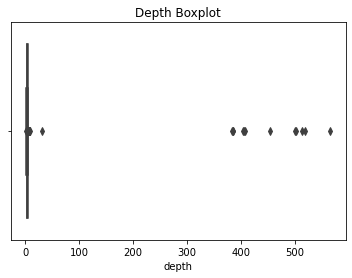

In [82]:
sns.boxplot(x=df['depth']).set(title='Depth Boxplot')

### Determining the IQR for Depth and Potential Outliers

In [83]:
depth_iqr = iqr(df["depth"])
print_iqr("Depth", depth_iqr)

depth_lower_limit = lower_limit(df["depth"], depth_iqr)
print_lower_limit("Depth", depth_lower_limit)

depth_upper_limit = upper_limit(df["depth"], depth_iqr)
print_upper_limit("Depth", depth_upper_limit)

Depth IQR is: 1.13
Depth lower limit is: 1.22
Depth upper limit is: 5.74


In [84]:
depth_low_outliers = low_outliers(df=df, column=df["depth"], low_lim_var=depth_lower_limit)
low_out_p(input="depth", low_out_var=depth_low_outliers)

depth_upper_outliers = upper_outliers(df=df, column=df["depth"], up_lim_var=depth_upper_limit)
up_out_p(input="depth", up_out_var=depth_upper_outliers)

price_total_outliers = total_outliers("depth", depth_low_outliers, depth_upper_outliers)

The number of low depth outliers is: 1
The number of high depth outliers is: 40
The total number of depth outliers is: 41


In [85]:
depth_low_outliers_per = low_outliers_per(low_out_var=depth_low_outliers, df=df)
low_out_per_p(input="depth", low_out_per_var=depth_low_outliers_per)

depth_upper_outliers_per= upper_outliers_per(up_out_var=depth_upper_outliers, df=df)
up_out_per_p(input="depth", up_out_per_var=depth_upper_outliers_per)

total_outliers_per(input="depth", low_out_per_var=depth_low_outliers_per, up_out_per_var=depth_upper_outliers_per)

The total percentage of diamonds that have low depth outliers is: 0.0018541867536898318%
The total percentage of diamonds that have upper depth outliers is: 0.07416747014759327%
The total percentage of diamonds that have depth outliers is: 0.0760216569012831%


## Categorical Variables

In [86]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
color_order = ['J','I','H', 'G', 'F', 'E', 'D']

In [87]:
df['cut'] = pd.Categorical(df['cut'],
                           categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                           ordered=True)
df['clarity'] = pd.Categorical(df['clarity'],
                            categories=['I1', 'SI2', 'SI1','VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
                           ordered=True)
df['color'] = pd.Categorical(df['color'],
                             categories=['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                           ordered=True)


/var/folders/yg/1lv551fs3rv2fv563t7g29r00000gp/T/ipykernel_17506/1973125802.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yg/1lv551fs3rv2fv563t7g29r00000gp/T/ipykernel_17506/1973125802.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yg/1lv551fs3rv2fv563t7g29r00000gp/T/ipykernel_17506/1973125802.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

## Cut

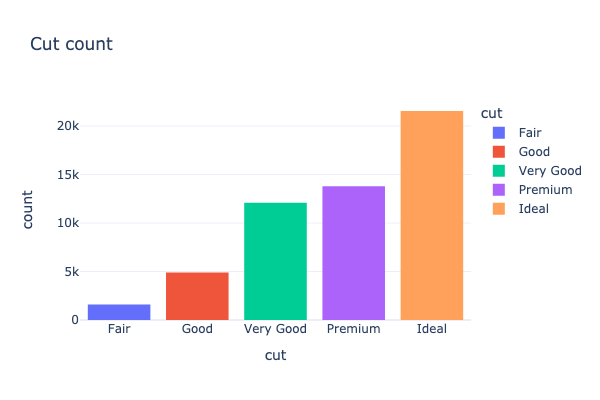

In [126]:
fig = px.histogram(df, x='cut', color='cut', template='plotly_white', title='Cut count', category_orders={'cut' : cut_order})
fig.update_layout(height=400, width=600)
fig.show('png')

In [82]:
cut_data = df.groupby('cut').sum()
cut_data

,carat,depthper,table,price,length,width,depth
cut,,,,,,,
Fair,1683.14,103049.6,95009.6,7011219,10057.50,9954.07,6412.260
Good,4164.68,305838.8,287835.9,19270749,28645.08,28703.75,18875.725
Very Good,9741.70,746825.1,700173.2,48102484,69359.09,69713.45,43009.520
Premium,12297.50,844776.2,810049.4,63187778,82385.88,81985.82,54301.035
Ideal,15144.21,1329775.5,1205704.4,74495733,118691.07,118956.62,73710.426


In [83]:
cut_tab = pd.crosstab(df['cut'],columns='count')
cut_tab

col_0,count
cut,
Fair,1609
Good,4904
Very Good,12081
Premium,13789
Ideal,21549


In [84]:
cut_tab/cut_tab.sum()

col_0,count
cut,
Fair,0.029834
Good,0.090929
Very Good,0.224004
Premium,0.255674
Ideal,0.399559


In [85]:
df.groupby("cut").median()

,carat,depthper,table,price,length,width,depth
cut,,,,,,,
Fair,1.00,65.0,58.0,3282.0,6.18,6.10,3.97
Good,0.82,63.4,58.0,3054.0,5.98,5.99,3.70
Very Good,0.71,62.1,58.0,2647.0,5.74,5.77,3.56
Premium,0.86,61.4,59.0,3183.0,6.11,6.06,3.72
Ideal,0.54,61.8,56.0,1810.0,5.25,5.26,3.23


## Color

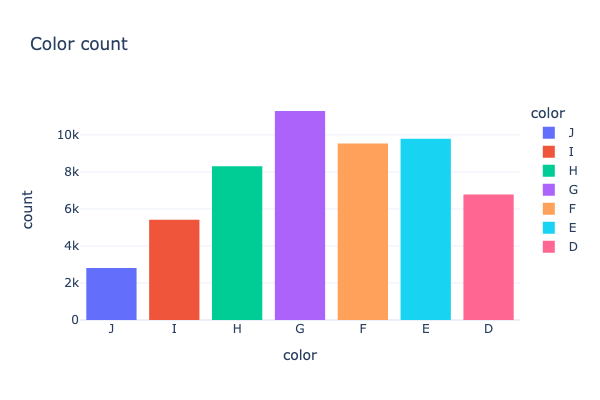

In [125]:
fig = px.histogram(df, x='color', color='color', template='plotly_white', title='Color count' ,category_orders={'color' : color_order})
fig.update_layout(height=400, width=600)
fig.show('png')

In [88]:
color_data = df.groupby('color').sum()
color_data

,carat,depthper,table,price,length,width,depth
color,,,,,,,
J,3263.28,173779.3,162337.2,14949281,18306.30,18302.84,11325.3700
I,5568.00,335331.1,312184.0,27608146,33740.16,33739.64,21369.0310
H,7568.33,513367.1,477515.9,37234128,49685.61,49697.90,32594.0445
G,8705.58,697241.6,646782.2,45139059,64110.82,64140.73,42202.4885
F,7025.56,588499.9,547854.8,35533652,53577.96,53614.23,33441.6520
E,6445.12,604103.5,563241.3,30142944,53017.25,53090.23,32728.7300
D,4455.36,417942.7,388857.1,21460753,36700.52,36728.14,22647.6500


In [89]:
color_tab = pd.crosstab(df['color'],columns='count')
color_tab

col_0,count
color,
J,2808
I,5422
H,8302
G,11290
F,9539
E,9797
D,6774


In [90]:
color_tab/color_tab.sum()

col_0,count
color,
J,0.052066
I,0.100534
H,0.153935
G,0.209338
F,0.176871
E,0.181655
D,0.125603


In [91]:
df.groupby("color").median()

,carat,depthper,table,price,length,width,depth
color,,,,,,,
J,1.11,62.0,58.0,4234.0,6.64,6.63,4.11
I,1.00,61.9,57.0,3730.0,6.35,6.35,3.93
H,0.90,61.9,57.0,3455.5,6.14,6.14,3.82
G,0.70,61.8,57.0,2241.5,5.64,5.63,3.49
F,0.70,61.8,57.0,2344.0,5.65,5.65,3.48
E,0.53,61.8,57.0,1739.0,5.23,5.24,3.22
D,0.53,61.8,57.0,1836.5,5.23,5.24,3.22


## Clarity

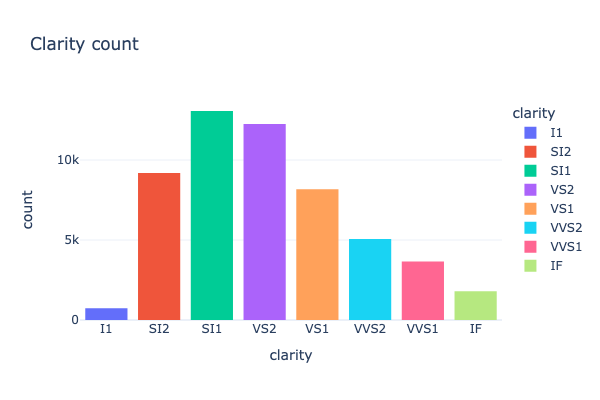

In [124]:
fig = px.histogram(df, x='clarity', color='clarity', template='plotly_white', title='Clarity count', category_orders={'clarity' : clarity_order})
fig.update_layout(height=400, width=600)
fig.show('png')

In [94]:
clarity_data = df.groupby('clarity').sum()
clarity_data

,carat,depthper,table,price,length,width,depth
clarity,,,,,,,
I1,951.33,46486.1,43203.1,2907809,5009.97,4971.65,4361.4190
SI2,9903.16,567680.7,532347.5,46522237,58854.20,58814.99,38549.1565
SI1,11111.55,808110.0,753361.1,52207755,76931.72,76930.06,48587.5650
VS2,9361.75,756492.4,703715.5,48094581,69352.20,69366.29,43705.0155
VS1,5940.47,503827.3,468255.1,31365809,45530.27,45609.12,28116.4700
VVS2,3020.36,312388.7,288888.6,16635412,26436.69,26505.91,16319.9400
VVS1,1838.44,225176.0,207853.7,9206298,18130.13,18183.90,11189.0300
IF,904.17,110104.0,101147.9,5128062,8893.44,8931.79,5480.3700


In [95]:
clarity_tab = pd.crosstab(df['clarity'],columns='count')
clarity_tab

col_0,count
clarity,
I1,741
SI2,9190
SI1,13065
VS2,12256
VS1,8170
VVS2,5066
VVS1,3654
IF,1790


In [96]:
clarity_tab/clarity_tab.sum()

col_0,count
clarity,
I1,0.013740
SI2,0.170400
SI1,0.242249
VS2,0.227249
VS1,0.151487
VVS2,0.093933
VVS1,0.067752
IF,0.033190


In [97]:
df.groupby("clarity").median()

,carat,depthper,table,price,length,width,depth
clarity,,,,,,,
I1,1.12,62.2,58.0,3344.0,6.65,6.61,4.110
SI2,1.01,61.9,58.0,4072.0,6.42,6.41,3.970
SI1,0.76,62.0,57.0,2822.0,5.87,5.87,3.620
VS2,0.63,61.8,57.0,2053.0,5.51,5.51,3.380
VS1,0.57,61.8,57.0,2005.0,5.36,5.37,3.300
VVS2,0.44,61.8,57.0,1311.0,4.90,4.90,3.010
VVS1,0.39,61.7,57.0,1092.5,4.70,4.71,2.900
IF,0.35,61.7,56.0,1080.0,4.57,4.59,2.805


# Multivariate Analysis

In [98]:
df.corr()

,carat,depthper,table,price,length,width,depth
carat,1.000000,0.028221,0.181658,0.921610,0.977765,0.953989,0.127129
depthper,0.028221,1.000000,-0.295700,-0.010670,-0.025097,-0.029141,0.003195
table,0.181658,-0.295700,1.000000,0.127165,0.196130,0.184530,0.021334
price,0.921610,-0.010670,0.127165,1.000000,0.887227,0.867872,0.111714
length,0.977765,-0.025097,0.196130,0.887227,1.000000,0.974933,0.124839
width,0.953989,-0.029141,0.184530,0.867872,0.974933,1.000000,0.121670
depth,0.127129,0.003195,0.021334,0.111714,0.124839,0.121670,1.000000


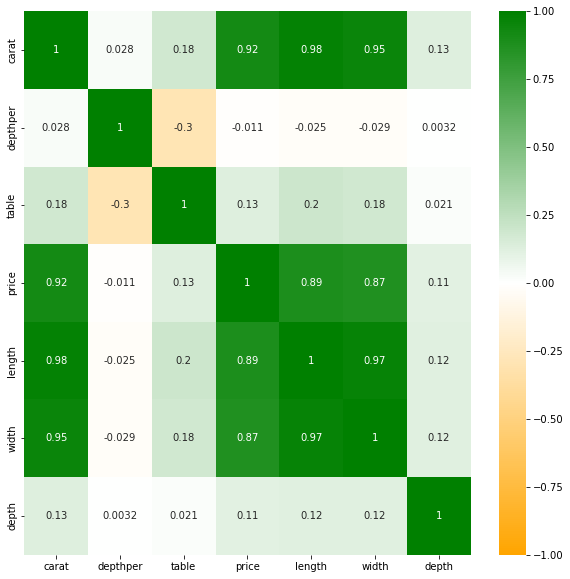

In [99]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(10,10))
cmap = LinearSegmentedColormap.from_list('RedGreenRed', ['orange', 'white','green'])
ax = sns.heatmap(df.corr(), cmap=cmap, vmin=-1, vmax=1, annot=True)#, fmt="0.2f", linewidths=.5)

### Price x Carat

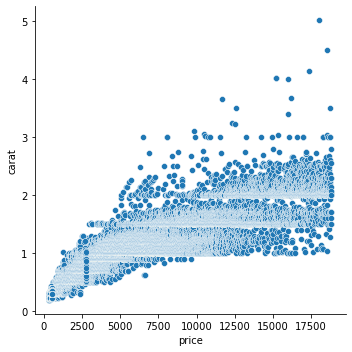

In [115]:
sns.relplot(x="price", y="carat", data=df, kind="scatter")

### Cut x Carat

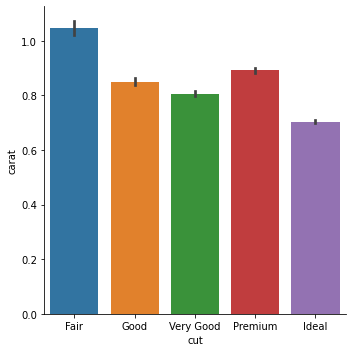

In [120]:
sns.catplot(data=df, x="cut", y="carat", kind="bar", order=cut_order)

<AxesSubplot:xlabel='cut', ylabel='carat'>

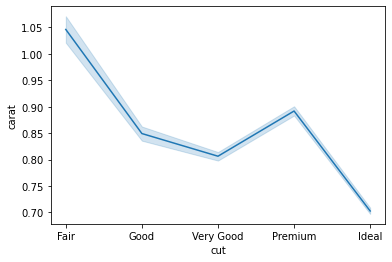

In [139]:
sns.lineplot(x="cut", y="carat", data=df)


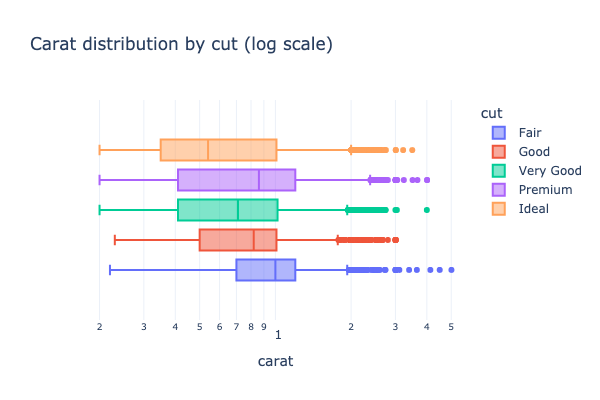

In [123]:
fig = px.box(df, x='carat', color='cut', template='plotly_white', log_x=True,
             title='Carat distribution by cut (log scale)', category_orders={'cut': cut_order})
fig.update_layout(height=400, width=600)
fig.show('png')

### Cut x Price

<AxesSubplot:xlabel='cut', ylabel='price'>

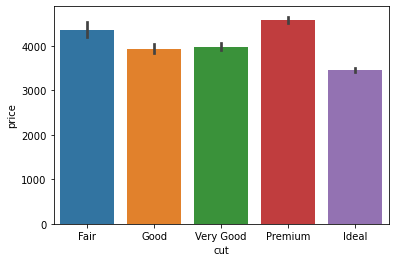

In [109]:
sns.barplot(data=df, x="cut", y="price", order=cut_order)

<AxesSubplot:xlabel='cut', ylabel='price'>

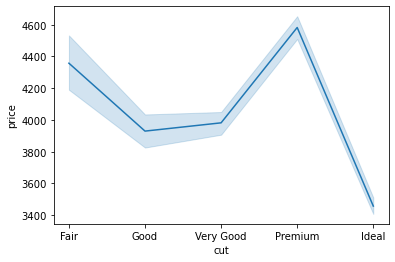

In [110]:
sns.lineplot(x='cut', y='price', data=df)


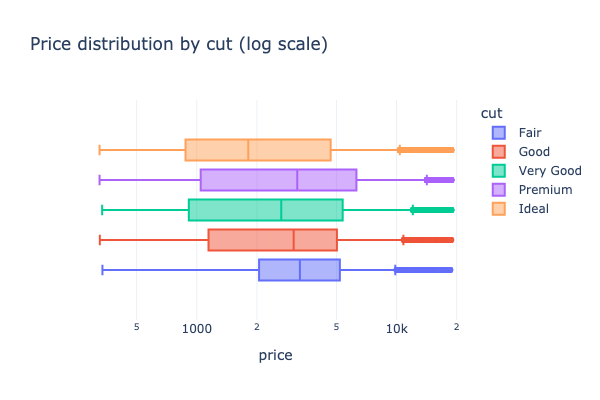

In [122]:
fig = px.box(df, x='price', color='cut', template='plotly_white', log_x=True,
             title='Price distribution by cut (log scale)', category_orders={'cut': cut_order})
fig.update_layout(height=400, width=600)
fig.show('png')

### Clarity x Carat

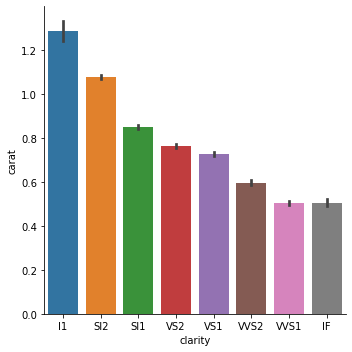

In [101]:
sns.catplot(data=df, x="clarity", y="carat", kind="bar", order=clarity_order)


<AxesSubplot:xlabel='clarity', ylabel='carat'>

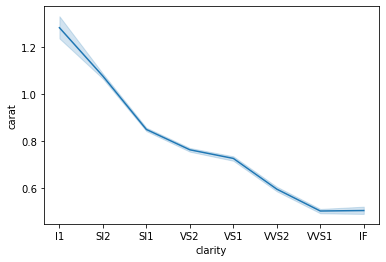

In [138]:
sns.lineplot(x="clarity", y="carat", data=df)


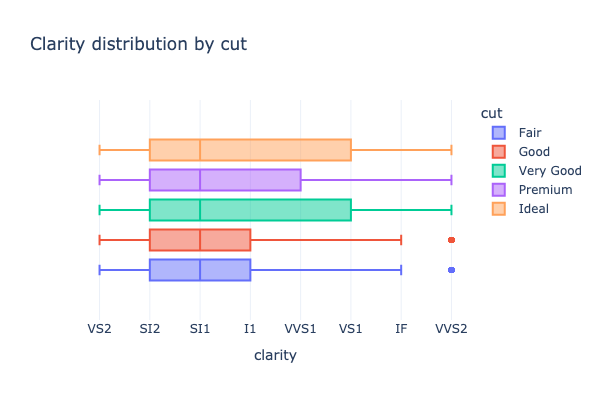

In [121]:
fig = px.box(df, x='clarity', color='cut', template='plotly_white', log_x=False,
             title='Clarity distribution by cut', category_orders={'cut': cut_order})
fig.update_layout(height=400, width=600)
fig.show('png')

### Clarity x Price

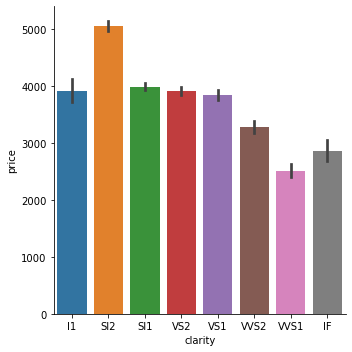

In [135]:
sns.catplot(data=df, x="clarity", y="price", kind="bar", order=clarity_order)

<AxesSubplot:xlabel='clarity', ylabel='price'>

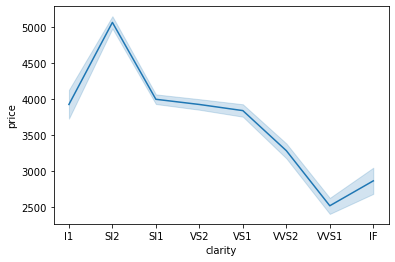

In [137]:
sns.lineplot(x="clarity", y="price", data=df)


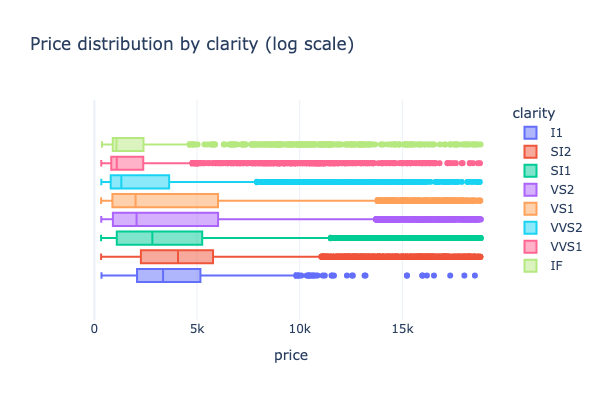

In [120]:
fig = px.box(df, x='price', color='clarity', template='plotly_white', log_x=False,
             title='Price distribution by clarity (log scale)', category_orders={'clarity': clarity_order})
fig.update_layout(height=400, width=600)
fig.show('png')


### Color x Carat

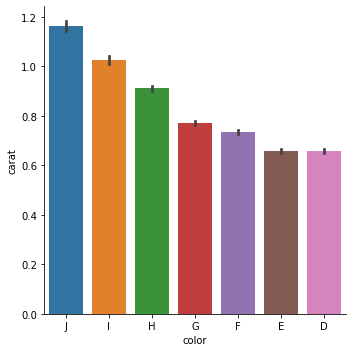

In [124]:
sns.catplot(data=df, x="color", y="carat", kind="bar", order=color_order)


<AxesSubplot:xlabel='color', ylabel='carat'>

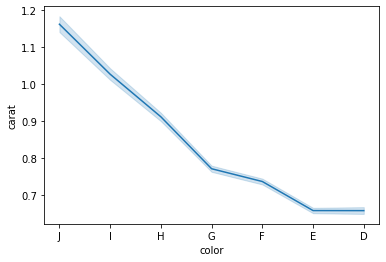

In [136]:
sns.lineplot(x="color", y="carat", data=df)

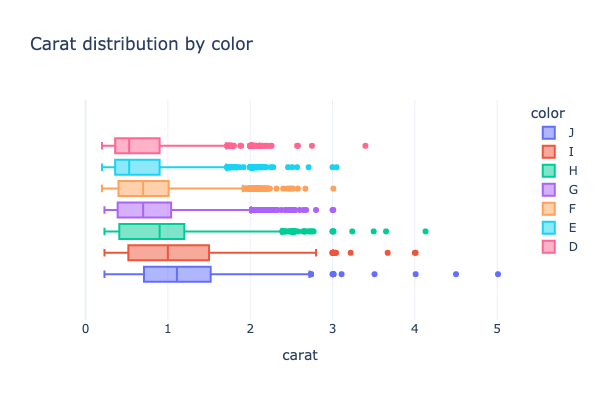

In [119]:
fig = px.box(df, x='carat', color='color', template='plotly_white', log_x=False,
             title='Carat distribution by color', category_orders={'color': color_order})
fig.update_layout(height=400, width=600)
fig.show("png")


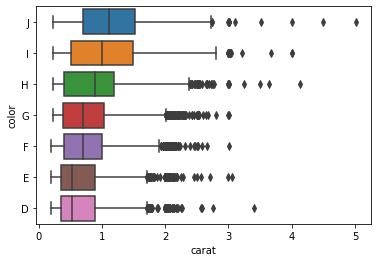

In [115]:
ax = sns.boxplot(x="carat", y="color", data=df)


### Color x Price

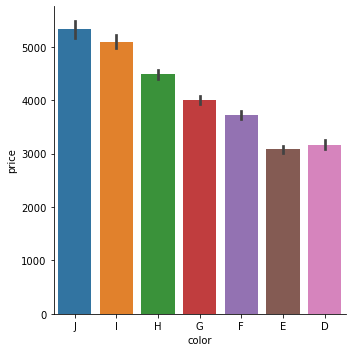

In [136]:
sns.catplot(data=df, x="color", y="price", kind="bar", order=color_order)

<AxesSubplot:xlabel='color', ylabel='price'>

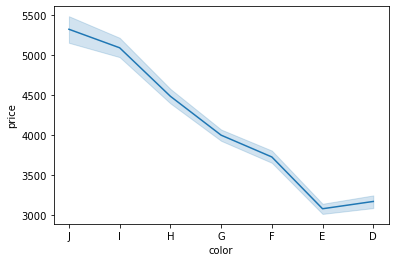

In [138]:
sns.lineplot(x='color', y='price', data=df)


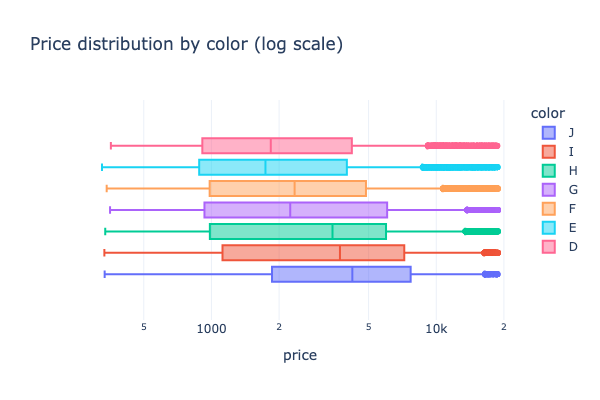

In [118]:
fig = px.box(df, x='price', color='color', template='plotly_white', log_x=True,
             title='Price distribution by color (log scale)', category_orders={'color': color_order})
fig.update_layout(height=400, width=600)
fig.show('png')

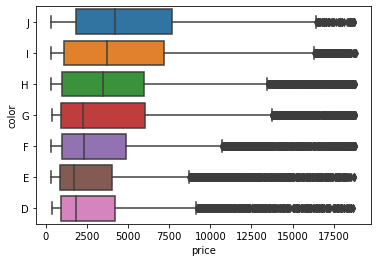

In [116]:
ax = sns.boxplot(x="price", y="color", data=df)


## Ask and Answer Question

1. Are there a lot of outliers? How do the stats look if we disregard outliers?
2. Give stats regarding the carat grouping. Like what % are around 1/3 ct, 1/2 ct, 1 ct, 2 ct?
3. 
4. 
5. 

## Summary and Conclusion


Insights:
- The number of carats are grouped around certain weights (1/3 of a carat, 1 carat, 2 carats, etc)
- Price is most highly correlated with carat size
- 
- 